## ECDF Example Notebook
- This notebook serves as an example of using ECDFs instead of histograms for data visualizaton.
  - ECDF stand for the "empirical cumulative distribution function", and they map every data point in the dataset to a quantile, which is a number between 0 and 1 that indicates the cumulative fraction of data points smaller than that data point itself.
- Reference links can be found below:
  - Allen Downey Twitter conversation [here](https://twitter.com/allendowney/status/1019171696572583936)
  - Eric Ma's blog post [here](https://ericmjl.github.io/blog/2018/7/14/ecdfs/)
- **This notebook is a copy from Eric Ma's thoughts (not my own)**

  
### TL;DR
- We can more easily identify central tendency measures, in particular, the median, compared to a histogram.
- We can much more easily identify other percentile values, compared to a histogram.
- We become less susceptible to outliers arising from binning issues.
- It is more difficult to hide multiple modes.
- We can easily identify repeat values.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data 1 Typical Histogram Example

In [2]:
# 50 random points with center of 0 and st dev of 1
data1 = np.random.normal(loc=0, scale=1, size=50)
data1

array([ 1.32969688, -0.69374442, -0.34807104,  1.37701731, -1.22449176,
        0.05418915,  0.2428482 ,  0.79424913,  1.26577726,  0.42515345,
        0.50844953, -0.71160564,  1.18547968,  0.64012741, -0.45944513,
        1.41031151, -0.90420607,  0.47763045,  0.92088013, -2.37175013,
       -0.42859351,  0.11704078,  0.86308618, -1.33907291, -1.05524031,
        0.31846311, -0.65190886,  0.30275171,  0.41942187, -0.30000629,
       -0.09377795, -0.55801574, -0.88941878, -0.56819666, -1.7531623 ,
       -0.3678947 ,  0.46248429,  0.94448271,  0.5850258 ,  0.61233392,
        1.34454403, -0.55971666,  1.28324294, -0.90489799,  0.40707269,
       -0.19738617,  0.56719618,  1.72939779,  1.1495597 , -1.670578  ])

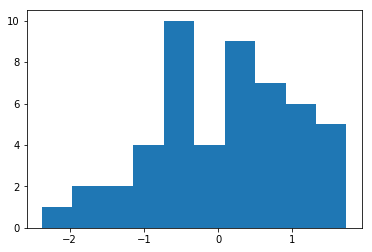

In [3]:
# Typical viz used
plt.hist(data1);

### Data 2 Typical Histogram Example

In [4]:
# 50 random points draw from [1,2,3,4,5]
data2 = np.random.choice([1,2,3,4,5], 50)
data2

array([1, 3, 4, 4, 3, 1, 4, 3, 5, 5, 5, 4, 3, 1, 3, 2, 2, 3, 3, 3, 2, 3,
       1, 5, 4, 1, 5, 3, 4, 4, 3, 3, 4, 4, 2, 2, 4, 2, 4, 1, 4, 3, 1, 2,
       1, 2, 4, 2, 1, 4])

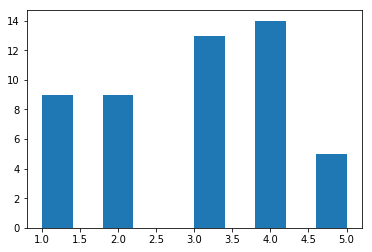

In [5]:
# Typical viz used
plt.hist(data2);

### ECDF

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)

    # x-data for the ECDF
    x = np.sort(data)

    # y-data for the ECDF
    y = np.arange(1, n+1) / n

    return x, y

### Data 1 ECDF Example

In [7]:
data1

array([ 1.32969688, -0.69374442, -0.34807104,  1.37701731, -1.22449176,
        0.05418915,  0.2428482 ,  0.79424913,  1.26577726,  0.42515345,
        0.50844953, -0.71160564,  1.18547968,  0.64012741, -0.45944513,
        1.41031151, -0.90420607,  0.47763045,  0.92088013, -2.37175013,
       -0.42859351,  0.11704078,  0.86308618, -1.33907291, -1.05524031,
        0.31846311, -0.65190886,  0.30275171,  0.41942187, -0.30000629,
       -0.09377795, -0.55801574, -0.88941878, -0.56819666, -1.7531623 ,
       -0.3678947 ,  0.46248429,  0.94448271,  0.5850258 ,  0.61233392,
        1.34454403, -0.55971666,  1.28324294, -0.90489799,  0.40707269,
       -0.19738617,  0.56719618,  1.72939779,  1.1495597 , -1.670578  ])

In [8]:
len(data1)

50

In [9]:
np.sort(data1)

array([-2.37175013, -1.7531623 , -1.670578  , -1.33907291, -1.22449176,
       -1.05524031, -0.90489799, -0.90420607, -0.88941878, -0.71160564,
       -0.69374442, -0.65190886, -0.56819666, -0.55971666, -0.55801574,
       -0.45944513, -0.42859351, -0.3678947 , -0.34807104, -0.30000629,
       -0.19738617, -0.09377795,  0.05418915,  0.11704078,  0.2428482 ,
        0.30275171,  0.31846311,  0.40707269,  0.41942187,  0.42515345,
        0.46248429,  0.47763045,  0.50844953,  0.56719618,  0.5850258 ,
        0.61233392,  0.64012741,  0.79424913,  0.86308618,  0.92088013,
        0.94448271,  1.1495597 ,  1.18547968,  1.26577726,  1.28324294,
        1.32969688,  1.34454403,  1.37701731,  1.41031151,  1.72939779])

In [10]:
np.arange(1, len(data1)+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [11]:
np.arange(1, len(data1)+1) / len(data1)

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

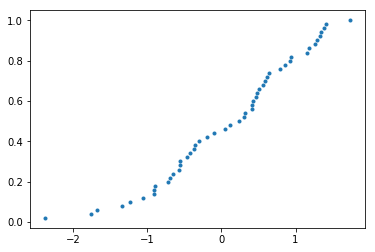

In [12]:
# Generate x- and y-data for the ECDF
x_ecdf, y_ecdf = ecdf(data1)

# Plot the ECDF
plt.plot(x_ecdf, y_ecdf, marker='.', linestyle='none');

### Data 2 ECDF Example

In [13]:
data2

array([1, 3, 4, 4, 3, 1, 4, 3, 5, 5, 5, 4, 3, 1, 3, 2, 2, 3, 3, 3, 2, 3,
       1, 5, 4, 1, 5, 3, 4, 4, 3, 3, 4, 4, 2, 2, 4, 2, 4, 1, 4, 3, 1, 2,
       1, 2, 4, 2, 1, 4])

In [14]:
len(data2)

50

In [15]:
np.sort(data2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5])

In [16]:
np.arange(1, len(data2)+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [17]:
np.arange(1, len(data2)+1) / len(data2)

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

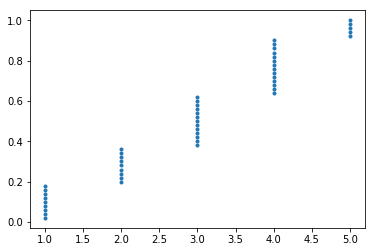

In [18]:
# Generate x- and y-data for the ECDF
x_ecdf, y_ecdf = ecdf(data2)

# Plot the ECDF
plt.plot(x_ecdf, y_ecdf, marker='.', linestyle='none');

In [19]:
def compare(data):
    # Set up figure
    fig     = plt.figure(figsize=(8, 4))

    ax_ecdf = fig.add_subplot(121)
    ax_hist = fig.add_subplot(122)

    ax_ecdf.set_title('ecdf')
    ax_hist.set_title('histogram')

    # Plot histogram
    ax_hist.hist(data)

    # Plot ECDF
    x_ecdf, y_ecdf = ecdf(data)
    ax_ecdf.plot(x_ecdf, y_ecdf, marker='.', linestyle='none');

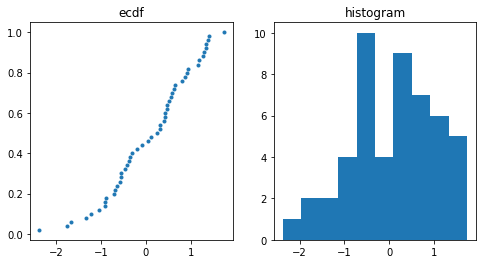

In [20]:
compare(data1)

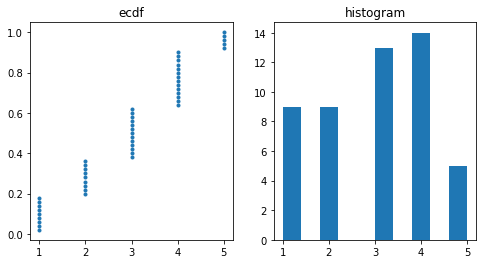

In [21]:
compare(data2)

**Is the central tendency measure easily discoverable?** The median is easily discoverable on the ECDF: Draw a horizontal line from 0.5 on the y-axis until it crosses a data point, and then drop a line down to the x-axis to get the median value.

**Are percentiles easily discoverable?** It's much clearer that the answer is "yes" for the ECDF, and "no" for the histogram.

**What is the value of the potential outlier?** Difficult to tell on the histogram. On the other hand, just drop a line down from the suspected outliers to the x-axis to read off their values.

**Are there repeat values?** You can't tell in a histogram. However, it's evidently clear on the ECDF scatterplot when there's repeat values -- they show up on the plot as vertical stacks of dots. (Repeat-values might be important when working with, say, a zero- or X-inflated distribution.)